WhatsApp is one of the most used messenger applications today with more than 2 Billion users worldwide. It was found that more than 65 billion messages are sent on WhatsApp daily so we can use WhatsApp chats for analyzing our chat with a friend, customer, or a group of people. In this article, I will take you through the task of WhatsApp Chat Analysis with Python.

# WhatsApp Chat Analysis
You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

1.If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.

2.Then scroll to the bottom and top on Export Chat.

3.Then select without media for simplicity if it asks you whether you want your chats with or without media.

4.Then email this chat to yourself and download it to your system.

So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis. In the section below, I will take you through WhatsApp chat analysis with Python.

# WhatsApp Chat Analysis with Python
I hope you now have understood how to get your WhatsApp data for the task of WhatsApp chat analysis with Python. Now let’s start this task by importing the necessary Python libraries that we need for this task:

In [2]:
pip install emoji

     |████████████████████████████████| 185 kB 7.0 MB/s 
  Created wheel for emoji: filename=emoji-1.4.1-py3-none-any.whl size=186393 sha256=075732ca4e08a3434421c8d63807eb7b4a8b1cc80fdd19d70b22da15c3bb8dc7
  Stored in directory: /root/.cache/pip/wheels/8e/68/ac/537456a5331f1405779f2b3c2a578429d2f6d7419e440330d8
Successfully built emoji


In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

The dataset we are using here requires a lot of preparation, so I suggest you take a look at the data you are using before starting this WhatsApp chat analysis task. As I have already walked through the dataset, so I’ll start by writing a few Python functions to prepare the data before importing it:

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:

In [6]:
data = []
conversation = 'WhatsApp Chat with 2021 Ekk Dhoka hai😟.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:

In [7]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date  ...                                            Message
555 2021-07-25  ...                                             Naa ma
556 2021-07-25  ...                                             Thanks
557 2021-07-25  ...                          Happy Birthday priyabrata
558 2021-07-25  ...                                                 ❤️
559 2021-07-25  ...                                                  😁
560 2021-07-25  ...                                    <Media omitted>
561 2021-07-25  ...                                    <Media omitted>
562 2021-07-25  ...                            Happy birthday dhunu cm
563 2021-07-25  ...                                    <Media omitted>
564 2021-07-25  ...                                                  😊
565 2021-07-25  ...                                    <Media omitted>
566 2021-07-25  ...                                       Wish karichu
567 2021-07-25  ...                                                Yaa
568 20

Now let’s have a look at the total number of messages between this WhatsApp chat:

In [8]:
total_messages =df.shape[0]
print(total_messages)

575


In [9]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

163


Now let’s extract the emojis present in between the chats and have a look at the emojis present in this chat:

In [10]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


Now let’s extract the URLs present in this chat and have a look at the final insights:

In [12]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between my group friends")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between my group friends
Total Messages:  575
Number of Media Shared:  163
Number of Emojis Shared 0
Number of Links Shared 3


Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [14]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Priyabrata IGIT", "SapnaSritakant IGIT"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Priyabrata IGIT -
Messages Sent 20
Average Words per message 3.65
Media Messages Sent 16
Emojis Sent 0
Links Sent 0
Stats of SapnaSritakant IGIT -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [15]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 7979 words in all the messages.


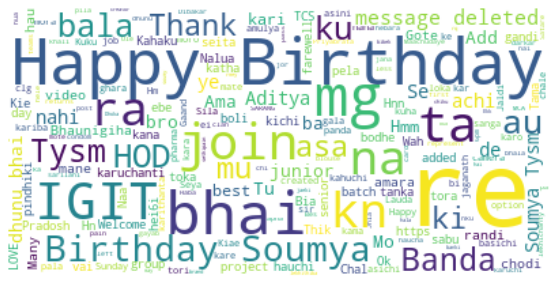

In [16]:

text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author name Priyabrata IGIT


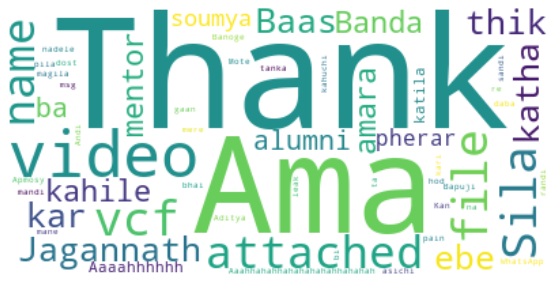

Author name  Nrusingha IGIT


ValueError: ignored

In [19]:
l = ["Priyabrata IGIT", " Nrusingha IGIT"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Summary
So this is how we can easily analyze any WhatsApp chat between you and your friend, customer, or even a group of people. You can further use this data for many other tasks of natural language processing. I hope you liked this article on the task of WhatsApp chat analysis with Python. Feel free to ask your valuable questions in the comments section below.